<a href="https://colab.research.google.com/github/ggwnsghgg/FastCampus/blob/main/2021_2_22_Pokemon_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%ED%83%90%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Library & Data Import

In [14]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/Pokemon.csv")

In [16]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### Feature Description
- Name : 포켓몬 이름
- Type 1 : 포켓몬 타입 1
- Type 2 : 포켓몬 타입 2
- Total : 포켓몬 총 능력치 (Sum of Attack, Sp. Atk, Defense, Sp. Def, Speed and HP)
- HP : 포켓몬 HP 능력치
- Attack : 포켓몬 Attack 능력치
- Defense : 포켓몬 Defense 능력치
- Sp. Atk : 포켓몬 Sp. Atk 능력치
- Sp. Def : 포켓몬 Sp. Def 능력치
- Speed : 포켓몬 Speed 능력치
- Generation : 포켓몬 세대
- Legendary : 전설의 포켓몬 여부

-----

## 2) EDA (Exploratory Data Analysis : 탐색적 데이터 분석)

### 2-1) 기본 정보 탐색

##### 데이터셋 기본 정보 탐색

In [17]:
df.shape

(800, 13)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [19]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

##### 개별 피처 탐색

In [20]:
df['Legendary'].value_counts()  # 전설의 포켓몬 분류

False    735
True      65
Name: Legendary, dtype: int64

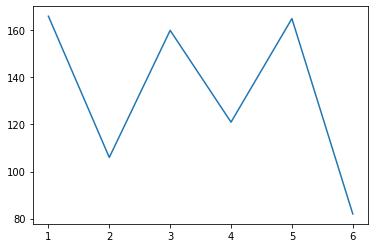

In [21]:
df['Generation'].value_counts().sort_index().plot()  # 포켓몬 세대

In [22]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [23]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [24]:
len(df[df['Type 2'].notnull()]['Type 2'].unique())

18

-----

### 2-2) 데이터 특징 탐색

##### 변수들의 분포 탐색

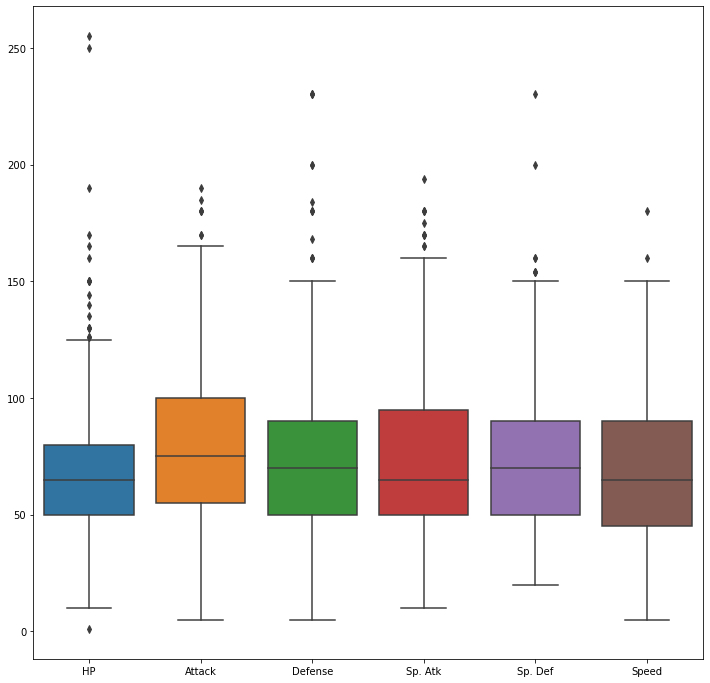

In [30]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
sns.boxplot(data = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax=ax)
plt.show()

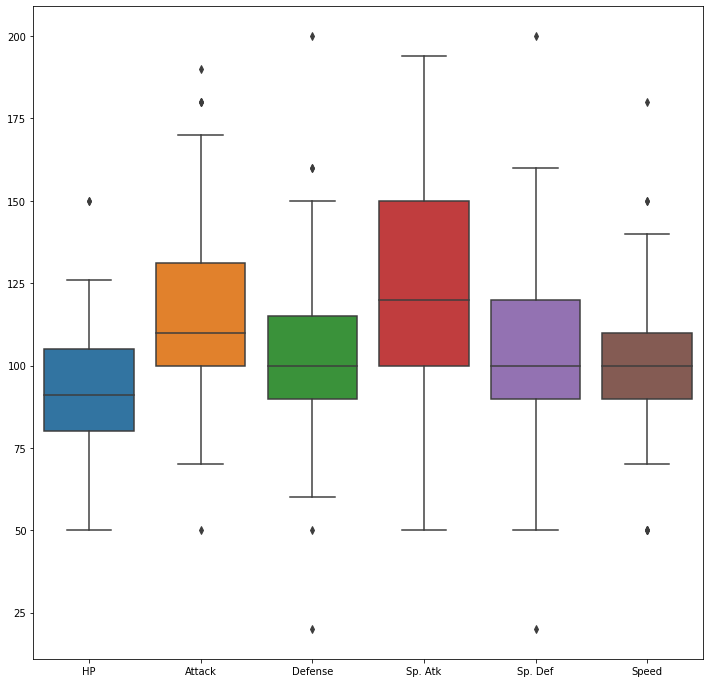

In [31]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
sns.boxplot(data = df[df['Legendary']==1][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax=ax)
plt.show()

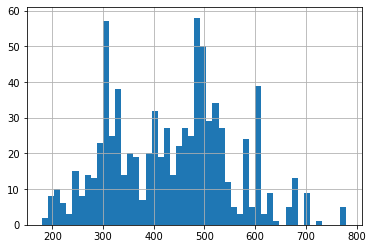

In [33]:
df['Total'].hist(bins=50)

##### Legendary 그룹별 탐색

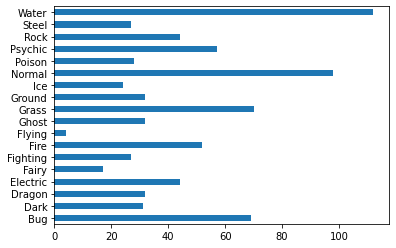

In [34]:
df['Type 1'].value_counts(sort=False).sort_index().plot.barh()

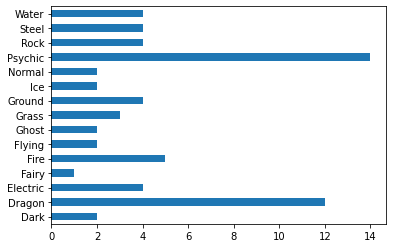

In [37]:
df[df['Legendary']==1]['Type 1'].value_counts(sort=False).sort_index().plot.barh()

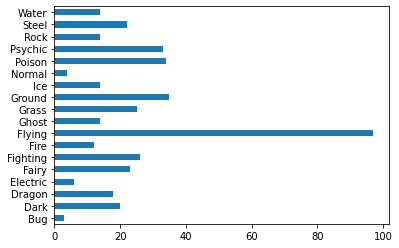

In [36]:
df['Type 2'].value_counts(sort=False).sort_index().plot.barh()

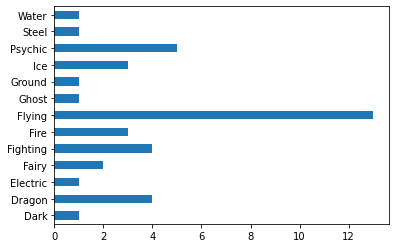

In [38]:
df[df['Legendary']==1]['Type 2'].value_counts(sort=False).sort_index().plot.barh()

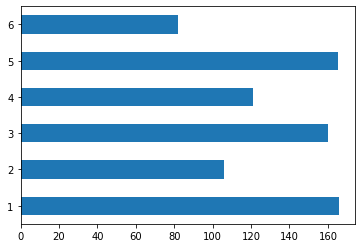

In [39]:
df['Generation'].value_counts(sort=False).sort_index().plot.barh()

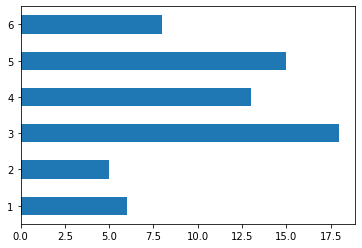

In [40]:
df[df['Legendary']==1]['Generation'].value_counts(sort=False).sort_index().plot.barh()

##### 포켓몬 능력 분포 탐색

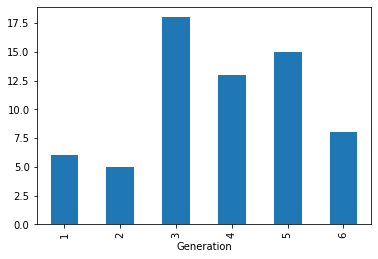

In [42]:
groups = df[df['Legendary']==1].groupby('Generation').size()
groups.plot.bar()

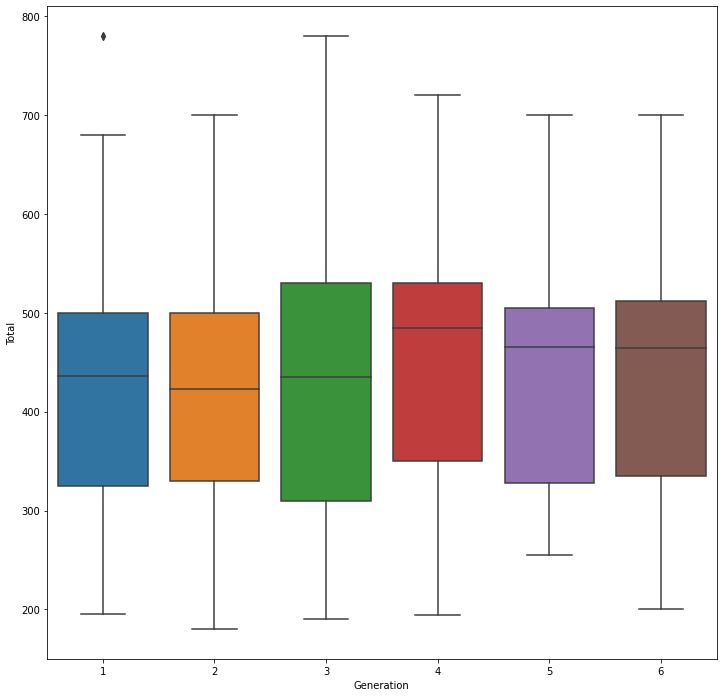

In [44]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
sns.boxplot(x='Generation', y='Total', data=df, ax=ax)
plt.show()

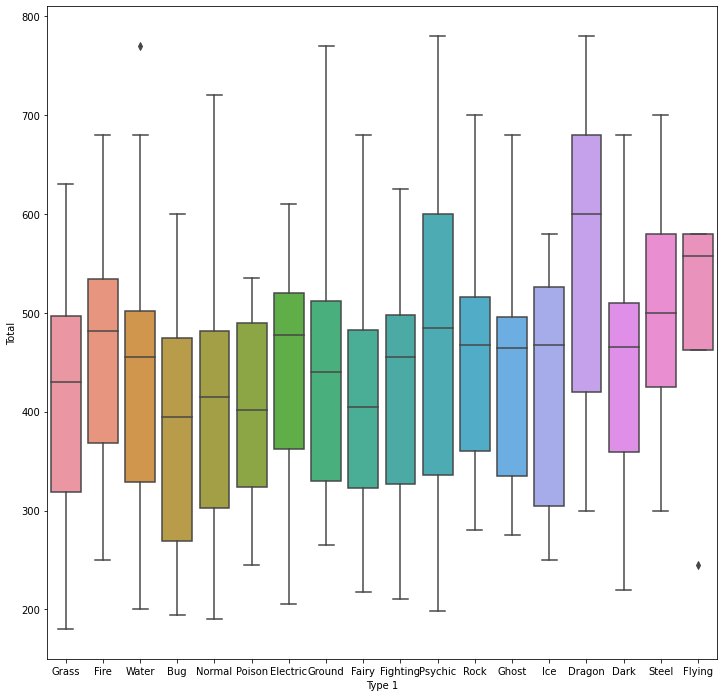

In [46]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
sns.boxplot(x='Type 1', y='Total', data=df, ax=ax)
plt.show()

-----

## 3) 지도 학습 기반 분류 분석

### 3-1) 데이터 전처리

##### 데이터 타입 변경

##### one-hot encoding

##### 피처 표준화

##### 데이터셋 분리

-----

### 3-2) Logistic Regression 모델 학습

##### 모델 학습

##### 모델 평가

-----

### 3-3) 클래스 불균형 조정

##### 1:1 샘플링

##### 데이터셋 분리

##### 모델 재학습

## 4) 비지도 학습 기반 군집 분류 분석

### 4-1) Kmeans 군집 분류

##### 2차원 군집 분석 (Kmeans)

##### 군집 시각화

##### 다차원 군집 분석 (Kmeans)

##### 군집별 특성 시각화